<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Labo_05_Correlatie_Lineaire_Regressie_demo_oplossing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo Labo 5 - Correlatie en lineaire regressie

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

## Voorbeeld - Heart disease

Voor meer uitleg over de gebruikte dataset kan je terecht op: https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning/data

In [3]:
dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data exploration

In [4]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Correlatiecoefficient via Pandas
correlatiecoefficienten = dataset.corr()
print(correlatiecoefficienten)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

# Correlatiecoëfficiënten via Pandas
correlatiecoefficienten = dataset.corr()
print(correlatiecoefficienten)


Text(0.5, 1.0, 'heatmap dataset')

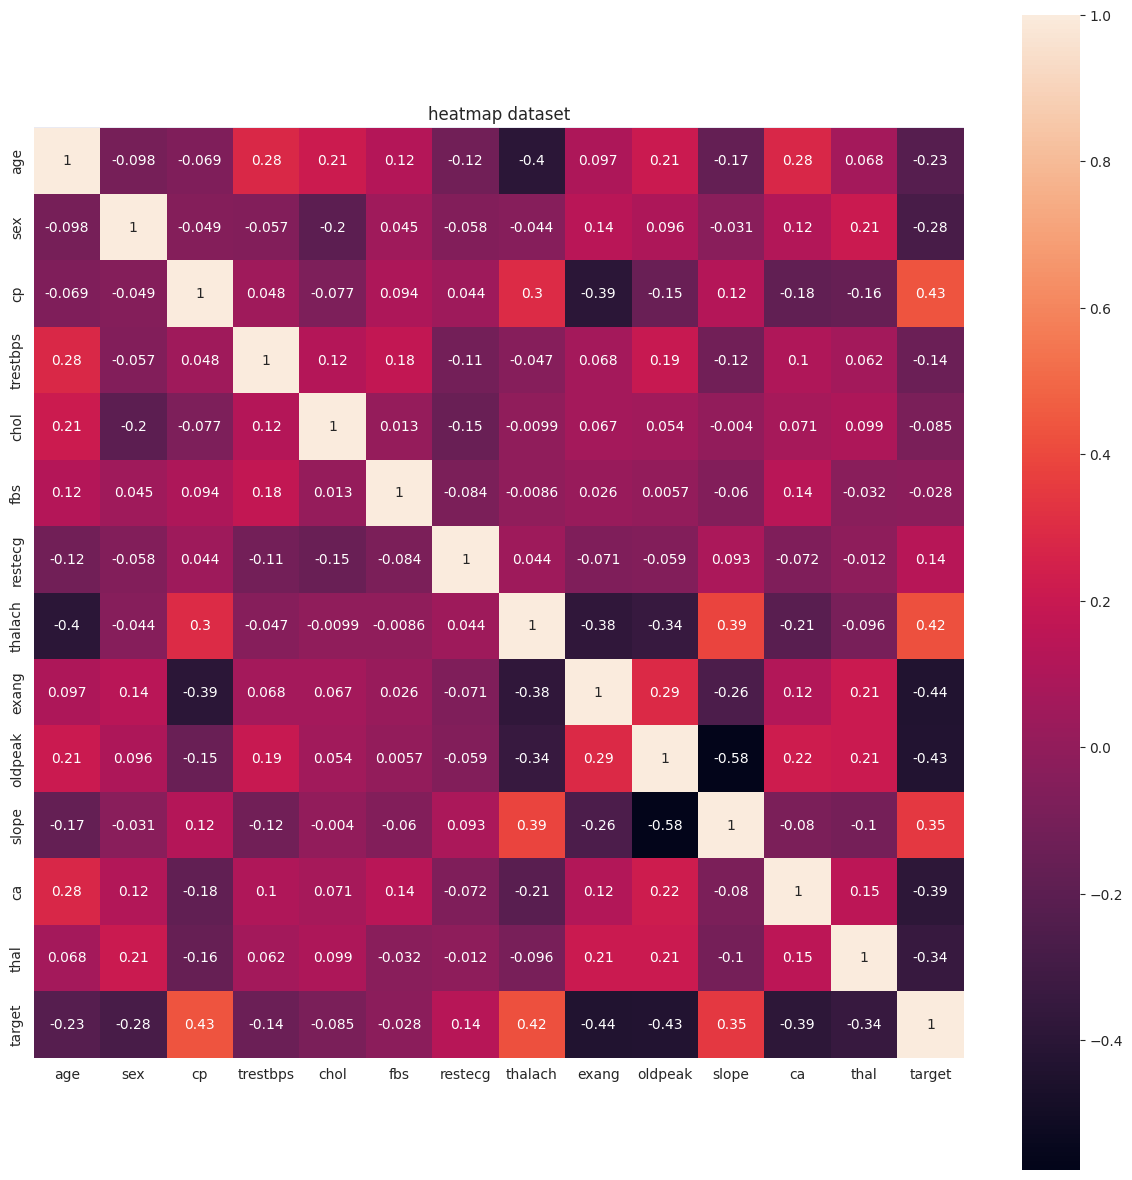

In [6]:
# Visualiseer de onderlinge correlatiecoëfficiënten
plt.figure(figsize=(15,15))
sns.heatmap(data= correlatiecoefficienten,square=True, annot=True)
plt.title("heatmap dataset")

### **📊 Uitleg van de Heatmap Code**

```python
# Visualiseer de onderlinge correlatiecoëfficiënten
plt.figure(figsize=(15,15))
sns.heatmap(data=correlatiecoefficienten, square=True, annot=True)
plt.title("heatmap dataset")
plt.show()
```

### **🔍 Uitleg van de Code:**

1. **Figuur Aanmaken:**

   ```python
   plt.figure(figsize=(15,15))
   ```

   * Hiermee maak je een lege figuur aan met een **vierkante** verhouding van **15x15** inch voor een duidelijke visualisatie.

2. **Heatmap Plotten:**

   ```python
   sns.heatmap(data=correlatiecoefficienten, square=True, annot=True)
   ```

   * **data=correlatiecoefficienten:** Gebruikt de eerder berekende **correlatiematrix** als input.
   * **square=True:** Zorgt ervoor dat de cellen in de heatmap vierkant worden, wat de leesbaarheid verbetert.
   * **annot=True:** Plaatst de exacte correlatiewaarden in elke cel.

3. **Titel Toevoegen:**

   ```python
   plt.title("heatmap dataset")
   ```

   * Voegt een titel toe om duidelijk te maken wat de visualisatie voorstelt.

4. **Plot Tonen:**

   ```python
   plt.show()
   ```

   * Laat de heatmap zien in het notebook of de script-output.

---

### **📝 Waarom een Heatmap Gebruiken?**

* Helpt bij het **visualiseren** van de sterkte en richting van **correlaties** tussen variabelen.
* Maakt snel **multicollineariteit** zichtbaar, wat belangrijk is voor **regressieanalyse** en **feature selectie**.

---

 😊


In [7]:
corr = np.corrcoef(dataset['age'],dataset['thalach'])
print(corr)

# Hoe ouder de patiënt hoe lager zijn maximale hartslag.

[[ 1.         -0.39852194]
 [-0.39852194  1.        ]]


🔍 Wat Gebeurt Hier?
Berekening van de Correlatiematrix:

python
Copy
Edit
corr = np.corrcoef(dataset['age'], dataset['thalach'])
np.corrcoef() berekent de correlatiecoëfficiënt tussen twee arrays.

Hier worden de 'age' en 'thalach' (maximale hartslag) kolommen uit de dataset gebruikt.

Het resultaat is een 2x2 matrix waarin de diagonale elementen altijd 1 zijn (de correlatie van een variabele met zichzelf) en de andere elementen de correlatie tussen de twee variabelen tonen.

Weergave van de Matrix:

python
Copy
Edit
print(corr)
Toont de matrix in de console, bijvoorbeeld:

lua
Copy
Edit
[[ 1.         -0.39852194]
 [-0.39852194  1.        ]]
📝 Interpretatie van de Uitkomst
1.0 (diagonaal) = Volledige correlatie van een variabele met zichzelf.

-0.3985 = Negatieve correlatie tussen leeftijd en maximale hartslag, wat betekent dat oudere patiënten meestal een lagere maximale hartslag hebben.



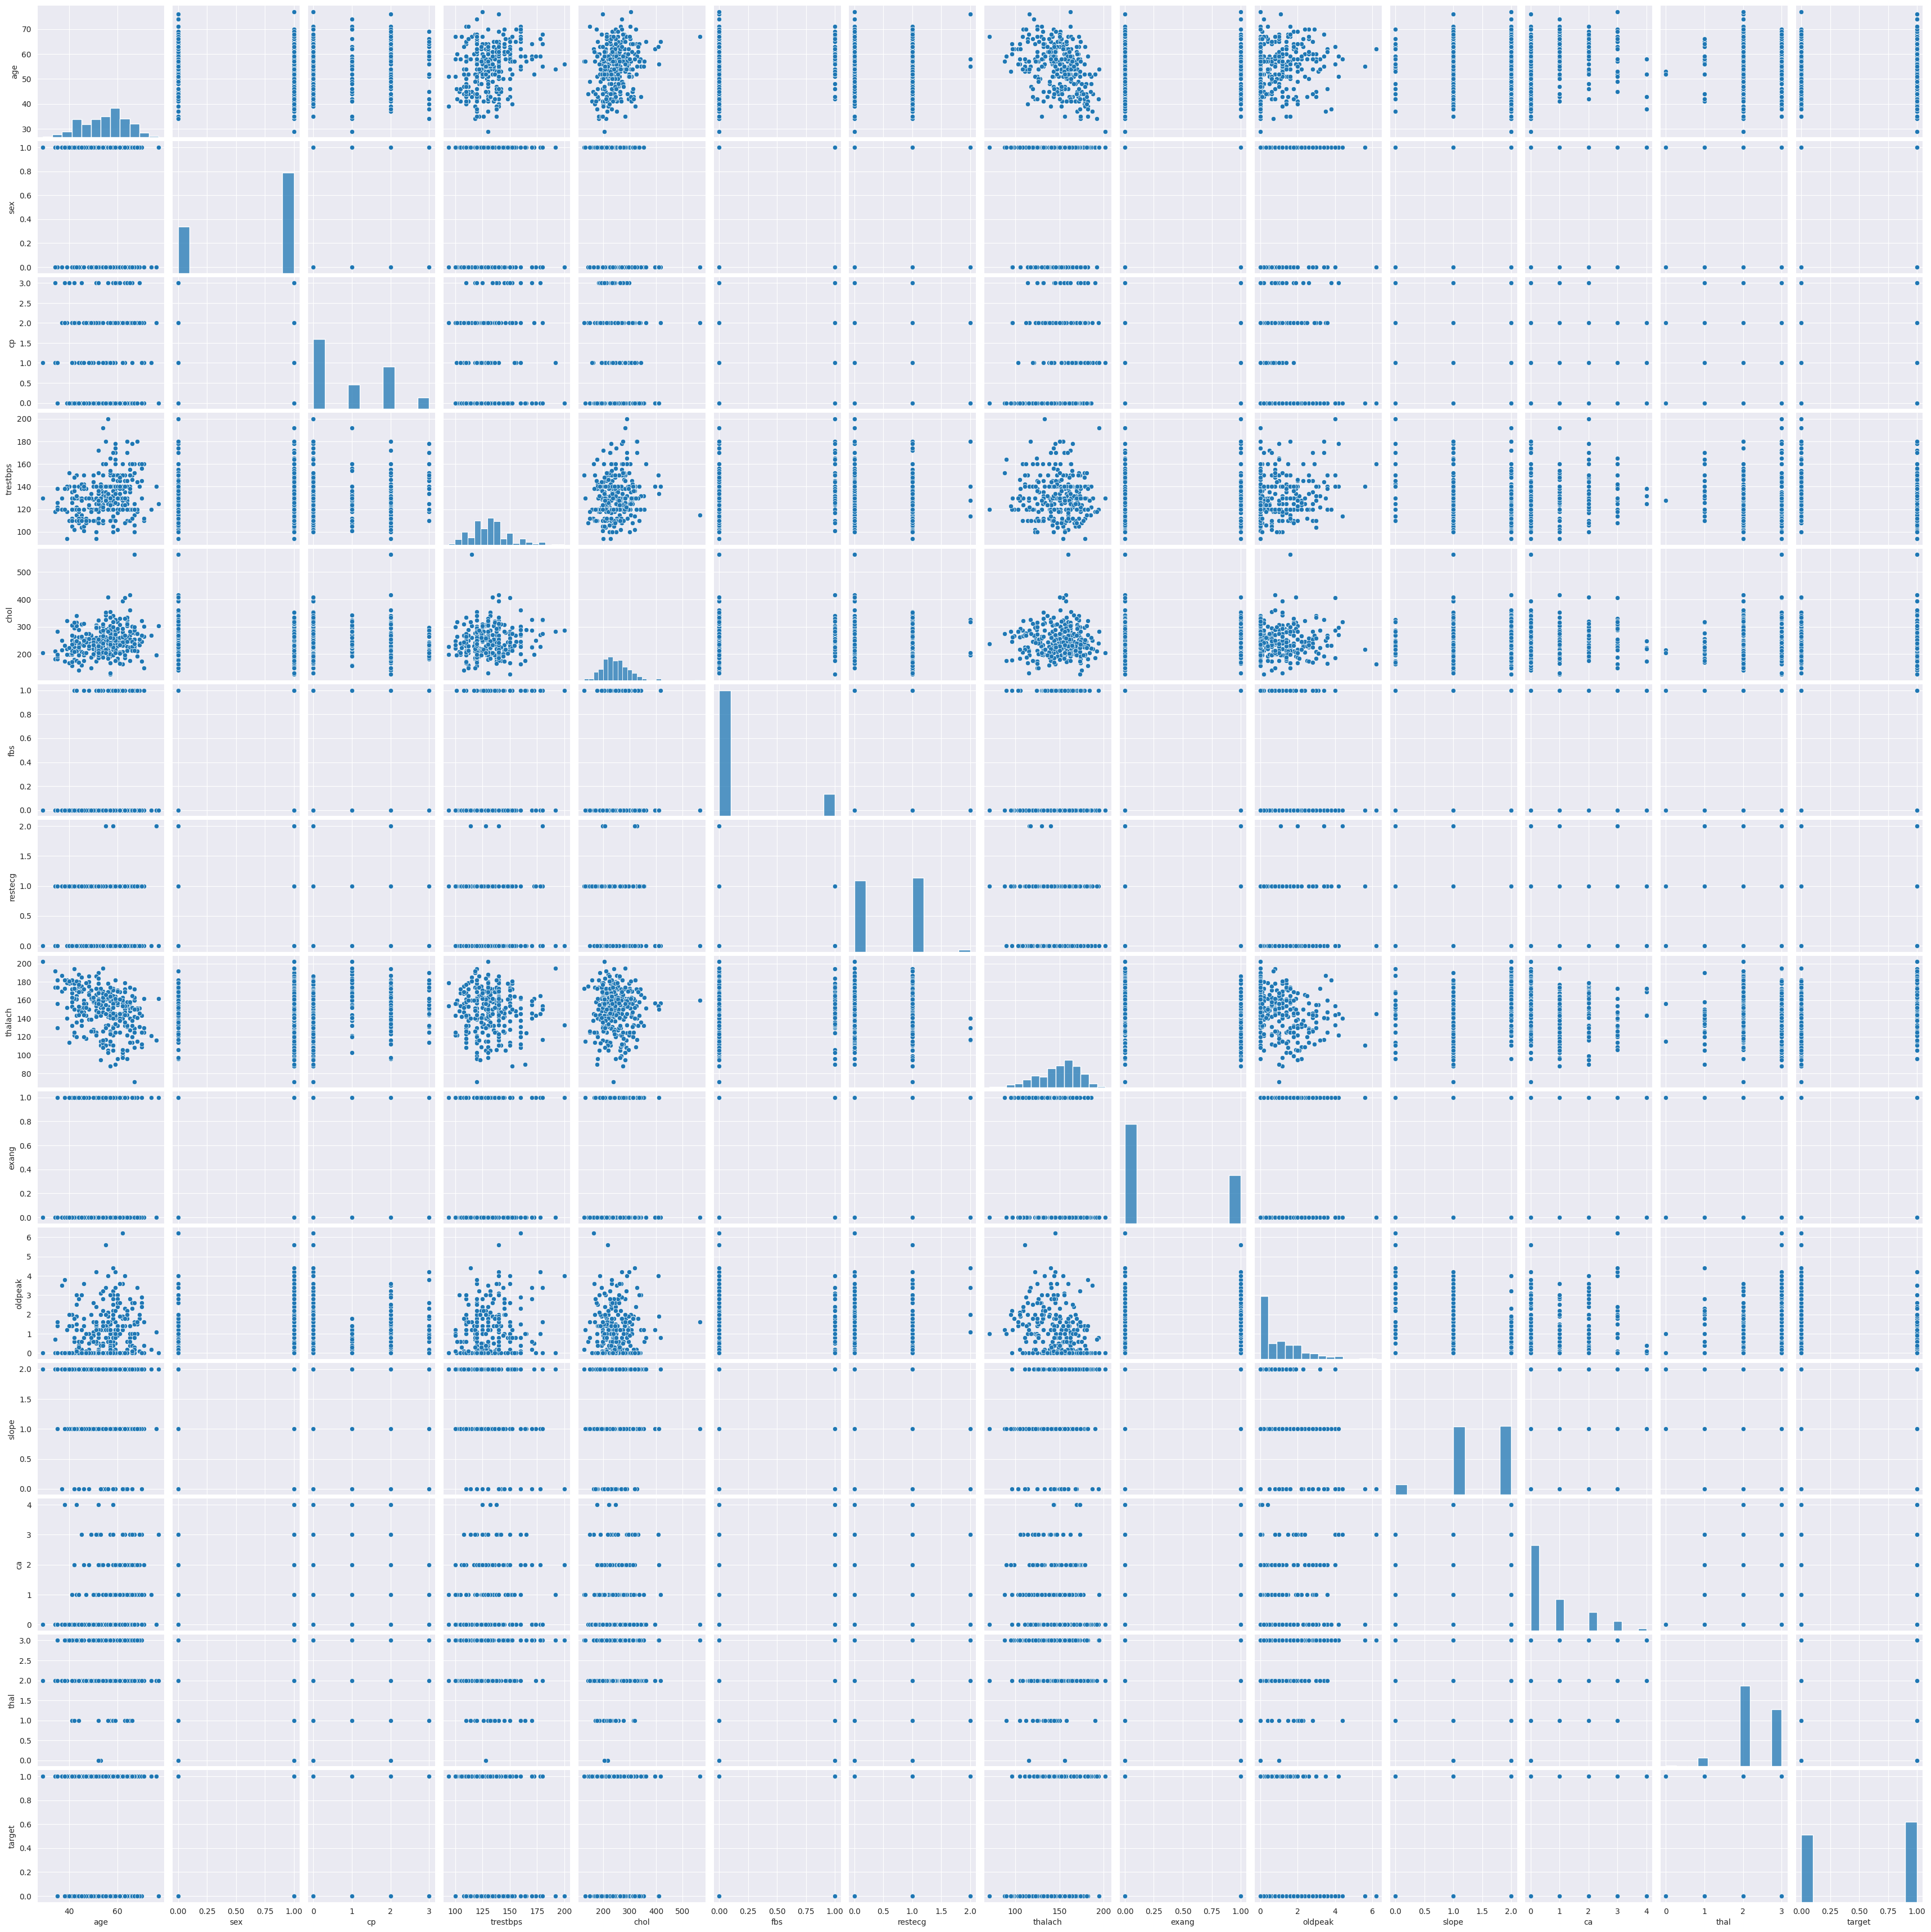

In [8]:
# pairplot
sns.pairplot(dataset);

Text(0.5, 1.0, 'leeftijd vs maximale hartslag')

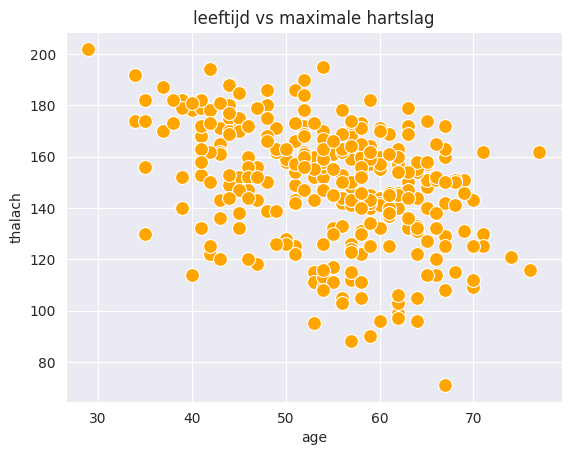

In [9]:
## Scatterplot tussen 'age' en 'thalach'
sns.scatterplot(x='age', y='thalach', data=dataset,color='orange',s=100)
sns.set_style("darkgrid")
plt.title("leeftijd vs maximale hartslag")



Text(0.5, 1.0, 'leeftijd vs maximale hartslag opgesplitst per geslacht')

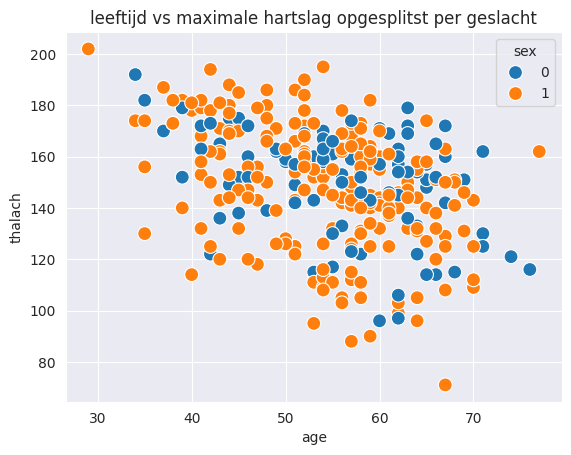

In [10]:
## Scatterplot tussen 'age' en 'thalach' volgens geslacht (ander kleur)
# Scatterplot
sns.scatterplot(x='age', y='thalach', data=dataset,color='orange',hue = 'sex',s=100)
sns.set_style("darkgrid")
plt.title("leeftijd vs maximale hartslag opgesplitst per geslacht")



In [11]:
# Tekenen van de regressielijn tussen 'age' en 'thalach'

# Regressielijn
def find_regressionline(dataset: pd.DataFrame, x: str, y: str) -> LinearRegression:
    onafhankelijke_variabele = dataset[x].values
    afhankelijke_variabele = dataset[y].values

    regressionline = LinearRegression()
    regressionline.fit(onafhankelijke_variabele.reshape(-1,1), afhankelijke_variabele)

    return regressionline

def plot_regressionline(dataset: pd.DataFrame, x: str, y:str, regressielijn: LinearRegression, title:str) -> None:
    plt.figure()
    sns.scatterplot(x=dataset[x], y=dataset[y], data=dataset,color='orange',s=100)
    sns.lineplot(dataset[x],regressielijn.predict(dataset[x].values.reshape(-1,1)),color='violet',linewidth=3)
    sns.set_style("darkgrid")
    plt.title(title)
    plt.show()

🔍 Wat Gebeurt Hier?
Regressielijn aanmaken:

python
Copy
Edit
def find_regressionline(dataset, x, y):
Deze functie maakt een lineair regressiemodel aan en traint het op de data.

Onafhankelijke en afhankelijke variabelen definiëren:

python
Copy
Edit
onafhankelijke_variabele = dataset[x].values
afhankelijke_variabele = dataset[y].values
Exporteert de x (onafhankelijke) en y (afhankelijke) waarden uit de dataset.

Model aanmaken en trainen:

python
Copy
Edit
regressionline = LinearRegression()
regressionline.fit(onafhankelijke_variabele.reshape(-1,1), afhankelijke_variabele)
Maakt een nieuw lineair regressiemodel aan en traint het op de data.

reshape(-1,1) zet de x waarden om naar de juiste vorm voor training.

Regressielijn plotten:

python
Copy
Edit
sns.scatterplot(x=dataset[x], y=dataset[y], data=dataset, color='orange', s=100)
sns.lineplot(dataset[x], regressielijn.predict(dataset[x].values.reshape(-1,1)), color='violet', linewidth=3)
Toont de data als oranje punten en de regressielijn als een paarse lijn.



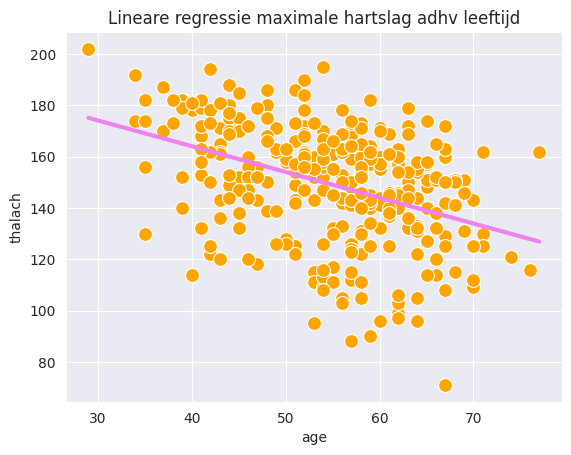

In [22]:
regressielijn = find_regressionline(dataset, 'age', 'thalach')
plot_regressionline(dataset, 'age', 'thalach', regressielijn, 'Lineare regressie maximale hartslag adhv leeftijd')

### **📝 Uitleg van de Code**

```python
regressielijn = find_regressionline(dataset, 'age', 'thalach')
plot_regressionline(dataset, 'age', 'thalach', regressielijn, 'Lineaire regressie maximale hartslag adhv leeftijd')
```

### **🔍 Wat Gebeurt Hier?**

1. **Regressielijn Bepalen:**

   ```python
   regressielijn = find_regressionline(dataset, 'age', 'thalach')
   ```

   * **find\_regressionline()** maakt een **lineair regressiemodel** aan.
   * Het model wordt getraind om de relatie te vinden tussen **leeftijd** ('age') en **maximale hartslag** ('thalach').

2. **Regressielijn Plotten:**

   ```python
   plot_regressionline(dataset, 'age', 'thalach', regressielijn, 'Lineaire regressie maximale hartslag adhv leeftijd')
   ```

   * **plot\_regressionline()** tekent de scatter plot van de **leeftijd** tegen de **maximale hartslag**.
   * De **regressielijn** wordt toegevoegd om de lineaire trend te laten zien.
   * **title** wordt gebruikt om de grafiek een naam te geven.

---

### **📊 Resultaat:**

* Je krijgt een grafiek met **oranje** punten (de data) en een **paarse** regressielijn die de lineaire relatie toont.
* De helling van de lijn geeft de **snelheid** van afname van de maximale hartslag met toenemende leeftijd aan.

---




In [14]:
score = regressielijn.score(dataset['age'].values.reshape(-1,1), dataset['thalach'])
print('De R²-score bedraagt {:.2f}'.format(score) )
# Het model kan niet bijzonder goed de maximale hartslag voorspellen uit de leeftijd

De R²-score bedraagt 0.16


In [15]:
x_value= np.array([[80]])
cholesterol = regressielijn.predict(x_value)

print('De voorspelde maximale hartslag bedraagt: ',cholesterol[0])

De voorspelde maximale hartslag bedraagt:  123.88306377248465


### Voorspelling van de maximale hartslag opgesplitst per leeftijd

In [16]:
mannen = dataset[dataset.sex==0]

regressielijn_mannen = find_regressionline(mannen, 'age', 'thalach')
mannen_score = regressielijn_mannen.score(mannen['age'].values.reshape(-1,1),mannen['thalach'])
print(mannen_score)
print(regressielijn_mannen.intercept_)
print(regressielijn_mannen.coef_[0])


0.16435189894344937
199.2169594590411
-0.8637657826132732


Hier is een lijn-per-lijn uitleg van de code:

---

### **🔹 R²-Score Berekenen:**

```python
score = regressielijn.score(dataset['age'].values.reshape(-1,1), dataset['thalach'])
```

1. **regressielijn.score(...)**

   * Meet hoe goed het model de variatie in de **afhankelijke variabele** (**'thalach'**) kan verklaren met de **onafhankelijke variabele** (**'age'**).
   * **R²-score** ligt tussen **0** (geen fit) en **1** (perfecte fit).

2. **dataset\['age'].values.reshape(-1,1)**

   * Haalt de **leeftijd**-waarden uit de dataset en maakt er een 2D-array van voor het model.

---

```python
print('De R²-score bedraagt {:.2f}'.format(score))
```

* Print de R²-score met **2 decimalen** voor betere leesbaarheid.

---

### **🔹 Voorspelling voor 80-jarige:**

```python
x_value = np.array([[80]])
```

* Maakt een **numpy array** aan met één waarde, **80** jaar, als voorbeeld voor de voorspelling.

---

```python
cholesterol = regressielijn.predict(x_value)
```

* Voert de voorspelling uit met het eerder getrainde model, gebruikt de leeftijd **80** als input.

---

```python
print('De voorspelde maximale hartslag bedraagt: ', cholesterol[0])
```

* Print de voorspelde maximale hartslag voor een 80-jarige.

---

### **🔹 Filteren van Mannen uit de Dataset:**

```python
mannen = dataset[dataset.sex == 0]
```

* Filtert alleen de **mannen** uit de dataset. Hier is **'sex == 0'** de voorwaarde voor mannen.

---

### **🔹 Regressielijn voor Mannen Berekenen:**

```python
regressielijn_mannen = find_regressionline(mannen, 'age', 'thalach')
```

* Maakt een nieuw regressiemodel, maar nu alleen voor **mannen**.

---

```python
mannen_score = regressielijn_mannen.score(mannen['age'].values.reshape(-1,1), mannen['thalach'])
```

* Berekent de R²-score voor de mannen, net zoals eerder voor de volledige dataset.

---

```python
print(mannen_score)
```

* Print de R²-score voor mannen om te zien of de fit beter of slechter is dan voor de volledige groep.

---

### **🔹 Intercept en Helling van de Lijn:**

```python
print(regressielijn_mannen.intercept_)
```

* Print de **intercept** van de regressielijn, het snijpunt met de y-as.

```python
print(regressielijn_mannen.coef_[0])
```

* Print de **helling** (slope) van de lijn, oftewel hoeveel de hartslag verandert per **jaar** leeftijd.

---

### **🔹 Visualisatie van de Regressielijn voor Mannen:**

```python
plot_regressionline(mannen, 'age', 'thalach', regressielijn_mannen, 'Maximale hartslag uit leeftijd mannen')
```

* Plot een scatter plot van de data met de regressielijn voor **mannen**.

---

Zal ik dit nu ook uitbreiden met een vergelijking tussen mannen en vrouwen om te zien of er een duidelijk verschil is in de helling en intercept? 😊


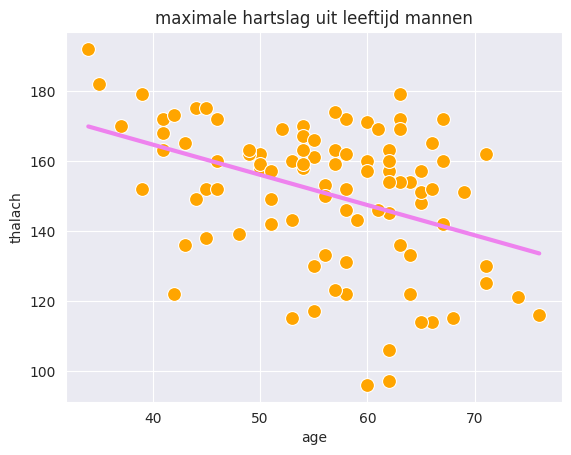

In [17]:
plot_regressionline(mannen, 'age', 'thalach', regressielijn_mannen, 'maximale hartslag uit leeftijd mannen')

In [18]:
vrouwen = dataset[dataset.sex==1]

regresielijn_vrouwen = find_regressionline(vrouwen, 'age', 'thalach')
print("intercept: ", regresielijn_vrouwen.intercept_)
print("rico: ",regresielijn_vrouwen.coef_[0])
score = regresielijn_vrouwen.score(vrouwen.age.values.reshape(-1,1), vrouwen.thalach.values)
print("R-squared value vrouwen: ", round(score, 2))


intercept:  208.6254270678881
rico:  -1.1098547270895793
R-squared value vrouwen:  0.17


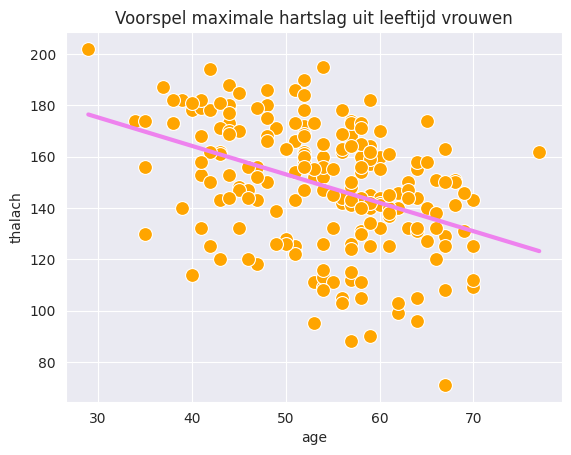

In [19]:
plot_regressionline(vrouwen, 'age', 'thalach', regresielijn_vrouwen, 'Voorspel maximale hartslag uit leeftijd vrouwen')

### Voorspelling van de maximale hartslag opgesplitst per  ca (number of major vessels (0-3) colored by flourosopy

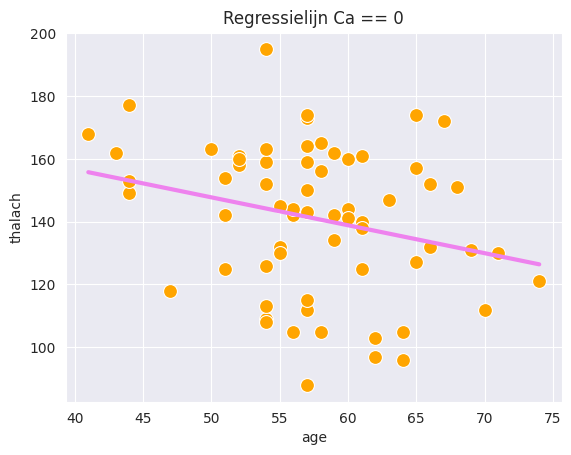

In [20]:
ca_val = 1 # varieer tussen 0 en 3

df = dataset[dataset.ca ==ca_val ]

regressielijn_ca_0 = find_regressionline(df, 'age', 'thalach')
plot_regressionline(df, 'age', 'thalach', regressielijn_ca_0, "Regressielijn Ca == 0")

In [21]:
score = regressielijn_ca_0.score(df['age'].values.reshape(-1,1), df['thalach'])
print(round(score, 2))

0.07


### **📝 Uitleg van de Code**

```python
ca_val = 1  # varieer tussen 0 en 3
```

* **Filterwaarde instellen:** Hier kies je een **specifieke waarde** voor de **ca**-kolom in de dataset, die staat voor het aantal grote bloedvaten gekleurd met fluoroscoop (0 tot 3).

---

```python
df = dataset[dataset.ca == ca_val]
```

* **Filteren van de Dataset:** Selecteert alleen de rijen waar **ca** gelijk is aan de gekozen waarde (**1** in dit geval).

---

```python
regressielijn_ca_0 = find_regressionline(df, 'age', 'thalach')
```

* **Regressielijn aanmaken:** Maakt een lineair regressiemodel voor de gefilterde data (**ca == 1**), waarbij **leeftijd** de onafhankelijke variabele is en **maximale hartslag (thalach)** de afhankelijke variabele.

---

```python
plot_regressionline(df, 'age', 'thalach', regressielijn_ca_0, "Regressielijn Ca == 0")
```

* **Plot de Regressielijn:** Tekent de regressielijn voor deze subset van de data, met een duidelijke titel.

---

```python
score = regressielijn_ca_0.score(df['age'].values.reshape(-1,1), df['thalach'])
```

* **R²-Score Berekenen:** Meet hoe goed de leeftijd de maximale hartslag kan verklaren voor mensen met **ca == 1**.

---

```python
print(round(score, 2))
```

* **Score Printen:** Toont de R²-score, afgerond op 2 decimalen.

---

### **📊 Resultaat:**

* Je krijgt een **grafiek** met de **regressielijn** voor de groep met **ca == 1**.
* De R²-score laat zien hoe goed dit model past bij de gefilterde data.

---
